In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
pd.options.mode.chained_assignment = None
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
import warnings 
warnings.filterwarnings("ignore") 


In [2]:

global_temp = global_temp.groupby(['Year', 'Month']).mean('AvgTemperature').reset_index()
# global_temp = global_temp.drop('Day', axis = 1)
global_temp['Date'] = pd.to_datetime(global_temp[['Year', 'Month']].assign(day=1))
global_temp.index = global_temp.Date
global_temp = global_temp.drop(['Year', 'Month', 'Date'], axis=1)
daily_sd

Date
1995-01-01    55.0
1995-01-02    53.1
1995-01-03    55.4
1995-01-04    54.2
1995-01-05    57.7
              ... 
2020-05-09    69.3
2020-05-10    68.7
2020-05-11    68.3
2020-05-12    67.2
2020-05-13    67.8
Name: AvgTemperature, Length: 9252, dtype: float64

In [ ]:
# train1 = niamey.iloc[:len(niamey)- 24]
# test1 = niamey.iloc[len(niamey) - 24:]

# model = SARIMAX(train1,
#                 order = (1, 0 ,0),
#                 seasonal_order =(2, 1, 2, 4) )
# result = model.fit()

# model = SARIMAX(niamey,  
#                     order = (1, 0, 0),  
#                     seasonal_order =(2, 1, 2, 4)) 
# result1 = model.fit()

# forecast1 = result.predict(start = len(niamey) - 12  ,
#                           end = (len(niamey)) + 12,
#                           typ = 'levels').rename('Forecast')

# train2 = kuwait.iloc[:len(kuwait)- 24]
# test2 = kuwait.iloc[len(kuwait) - 24:]

# model = SARIMAX(train2,
#                 order = (1, 0 ,0),
#                 seasonal_order =(2, 1, 1, 4) )
# result2 = model.fit()

# model = SARIMAX(kuwait,  
#                     order = (1, 0, 0),  
#                     seasonal_order =(2, 1, 1, 4)) 
# result2 = model.fit()

# forecast2 = result.predict(start = len(kuwait) - 12  ,
#                           end = (len(kuwait)) + 12,
#                           typ = 'levels').rename('Forecast')

# train3 = dubai.iloc[:len(dubai)- 24]
# test3 = dubai.iloc[len(dubai) - 24:]

# model = SARIMAX(train3,
#                 order = (3, 0 ,3),
#                 seasonal_order =(2, 1, 1, 4) )
# result3 = model.fit()

# model = SARIMAX(dubai,  
#                     order = (3, 0, 3),  
#                     seasonal_order =(2, 1, 1, 4)) 
# result = model.fit()

# forecast3 = result.predict(start = len(dubai) - 12  ,
#                           end = (len(dubai)) + 12,
#                           typ = 'levels').rename('Forecast')


In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose
# series = ...
# result = seasonal_decompose(global_temp, model='additive')
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)
# global_temp.index = global_temp.Date
# global_temp = global_temp.drop(['index', 'Year', 'Month', 'Day', 'Date'], axis = 1)

#result = seasonal_decompose(global_temp['AvgTemperature'], model='additive')

def plot_seasonal_decomposition(axs, series, sd):
    axs[0].plot(series.index, series)
    axs[0].set_title("Raw Series")
    axs[1].plot(series.index, sd.trend)
    axs[1].set_title("Trend Component $T_t$")
    axs[2].plot(series.index, sd.seasonal)
    axs[2].set_title("Seasonal Component $S_t$")
    axs[3].plot(series.index, sd.resid)
    axs[3].set_title("Residual Component $R_t$")

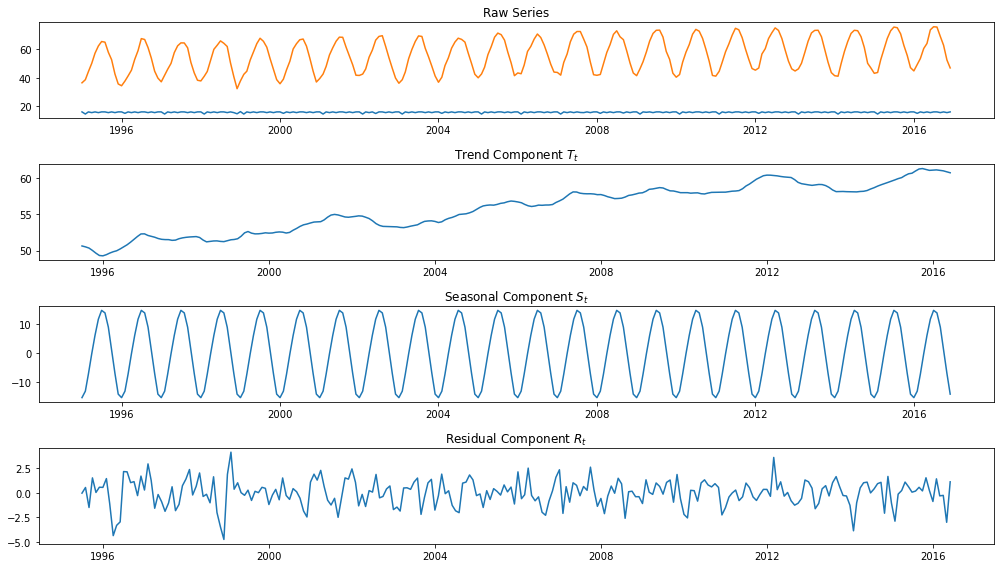

In [4]:

fig, axs = plt.subplots(4, figsize=(14, 8))
plot_seasonal_decomposition(axs, global_temp, result)
plt.tight_layout()

In [5]:


city_highest = city_temp.drop(['Region','Month','Day'], axis = 1)
city_highest = city_highest.groupby(['Country', 'City', 'Year']).mean('AvgTemperature').reset_index()
city_highest = city_highest.loc[(city_highest['Year'] == 2000) | (city_highest['Year'] == 2015)]
city_highest = city_highest.groupby(['Country', 'City', 'Year']).mean('AvgTemperature').reset_index()

pivot_data = pd.pivot_table(city_highest, values='AvgTemperature', index=['City', 'Country'], columns = 'Year')
pivot_data = pivot_data.loc[pivot_data[2000] > -50]
pivot_data['Diff'] = pivot_data[2015] - pivot_data[2000]
pivot_data_10 = pivot_data.nlargest(10, 'Diff')

drop_off = pivot_data_10.drop('Diff', axis = 1)
drop_off = drop_off.reset_index()
drop_off['Country, City'] = drop_off['Country'] + ', ' + drop_off['City']
# ax.bar(pivot_data_10_drop_diff.index, pivot_data_10_drop_diff.values)
drop_off.index = drop_off['Country, City']
drop_off = drop_off.drop(['City', 'Country', 'Country, City'], axis = 1)
drop_off = drop_off.sort_values(by=2015)

# ax = drop_off.plot.bar(figsize=(14,4))
city_highest


Country          City  Year  AvgTemperature
0       Albania        Tirana  2000       54.757923
1       Albania        Tirana  2015       60.090164
2       Algeria       Algiers  2000       64.182787
3       Algeria       Algiers  2015       64.047814
4     Argentina  Buenos Aires  2000       61.955191
..          ...           ...   ...             ...
605     Vietnam         Hanoi  2000       74.378142
606     Vietnam         Hanoi  2015       74.755191
607  Yugoslavia      Belgrade  2000       56.603825
608  Yugoslavia      Belgrade  2015       55.254372
609      Zambia        Lusaka  2000       55.885792

[610 rows x 4 columns]

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
result = adfuller(month_sd)

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

NameError: name 'month_sd' is not defined

In [7]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

get_stationarity(month_sd)

NameError: name 'month_sd' is not defined

In [8]:
sd_df = city_temp.loc[city_temp['City'] == 'San Diego']
sd_df = sd_df.drop(['Region', 'Country', 'City'], axis = 1)
# sd_df['Date'] = pd.to_datetime(sd_df[['Year', 'Month', 'Day']].assign(day=1))
# sd_df = sd_df.drop(['Month', 'Day', 'Year'], axis = 1)


# week_sd = sd_df.groupby(['Region', 'Country', 'City']).resample('W-Wed', label='right', closed = 'right', on='Date').mean().reset_index().sort_values(by='Date')
# week_sd = week_sd.drop(['Region', 'Country', 'City'], axis = 1)
# week_sd.index = week_sd.Date
# week_sd = week_sd.drop('Date', axis=1)
# month = week_sd.index.month
# dummies = pd.get_dummies(month, prefix='month').iloc[:,:11]

sd_df['Datetime'] = pd.to_datetime(sd_df[['Year', 'Month']].assign(day=1))
sd_df.drop('Day', axis = 1)
sd_df.index = sd_df.Datetime
month_sd = sd_df.drop(['Datetime', 'Day'], axis =1)
month_sd = month_sd.groupby(['Year', 'Month']).mean().reset_index()
month_sd['Datetime'] = pd.to_datetime(month_sd[['Year', 'Month']].assign(day=1))
month_sd.index = month_sd.Datetime
month_sd = month_sd.drop(['Datetime', 'Year', 'Month'], axis =1 )
month_sd

AvgTemperature
Datetime                  
1995-01-01       56.596774
1995-02-01       60.482143
1995-03-01       60.093548
1995-04-01       60.993333
1995-05-01       60.954839
...                    ...
2020-01-01       58.158065
2020-02-01       59.958621
2020-03-01       61.077419
2020-04-01       63.970000
2020-05-01       69.076923

[305 rows x 1 columns]

NameError: name 'week_sd' is not defined

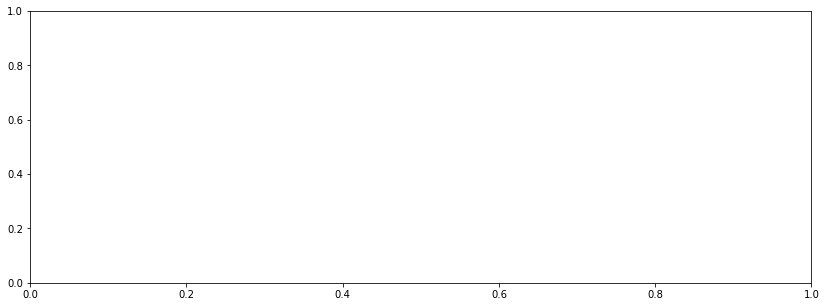

In [9]:
def create_monthly_dummies(series):
    month = series.index.month
    # Only take 11 of the 12 dummies to avoid strict colinearity.
    return pd.get_dummies(month).iloc[:, :11]
def fit_seasonal_trend(series):
    dummies = create_monthly_dummies(series)
    X = sm.add_constant(dummies.values, prepend=False)
    seasonal_model = sm.OLS(series.values, X).fit()
    return seasonal_model.predict(X)
def plot_seasonal_trend(ax, name, series):
    seasons_average_trend = fit_seasonal_trend(series)
    ax.plot(series.index, series)
    ax.plot(series.index, seasons_average_trend)
    
fig, ax = plt.subplots( figsize=(14, 5))

plot_seasonal_trend(ax, 'sd temps', week_sd)
plt.tight_layout()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

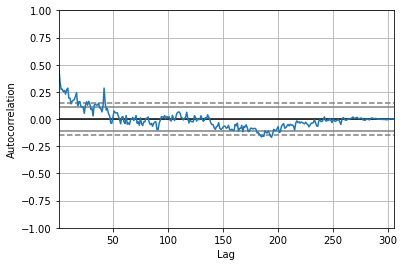

In [24]:
month_sd_seasonal_trend = fit_seasonal_trend(month_sd['AvgTemperature'])
month_sd_seasonal_detrended = month_sd['AvgTemperature'] - month_sd_seasonal_trend
month_sd_seasonal_detrended
autocorrelation_plot(month_sd_seasonal_detrended)

In [11]:
model = ARIMA(week_sd, order=(1,1,1))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

NameError: name 'ARIMA' is not defined

In [12]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'model_fit' is not defined

In [13]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

week_stationary = difference(np.log(week_sd.values), 52)
result = adfuller(week_stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



NameError: name 'week_sd' is not defined

In [28]:
stepwise_fit = auto_arima(weekly_sd, start_p = 0, start_q = 0, max_p = 5, max_q = 5, m = 12,
                          start_P = 0, seasonal = True, d = None, D=1, trace = True, error_action = 'ignore',
                          suppress_warning = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=8998.356, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6772.379, Time=0.69 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8996.409, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7089.116, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6617.165, Time=2.02 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8370.174, Time=1.74 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6558.798, Time=2.39 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=6724.014, Time=0.96 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.83 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=6560.6

In [15]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  305
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -726.668
Date:                             Fri, 04 Dec 2020   AIC                           1463.336
Time:                                     05:07:18   BIC                           1481.737
Sample:                                          0   HQIC                          1470.706
                                             - 305                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7125      0.121      5.881      0.000       0.475       0.950
ma.L1         -0.4227      0.145     -2.921      0.003      -0.706      -0.139
ar.S.L12      -0.6511      0.031    -21.268      0.000      -0.711      -0.591
ar.S.L24      -0.3798      0.029    -13.021      0.000      -0.437      -0.323
sigma2         8.1553      0.210     38.917      0.000       7.745       8.566
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              6300.61
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -2.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

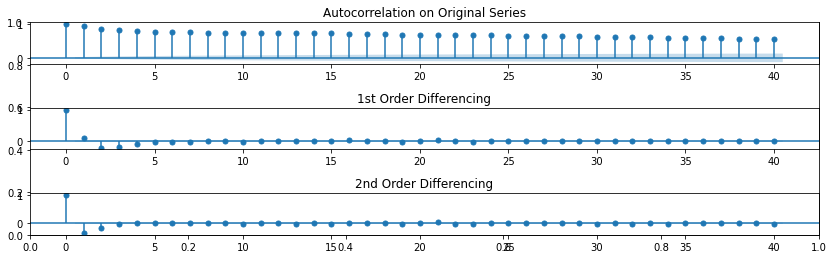

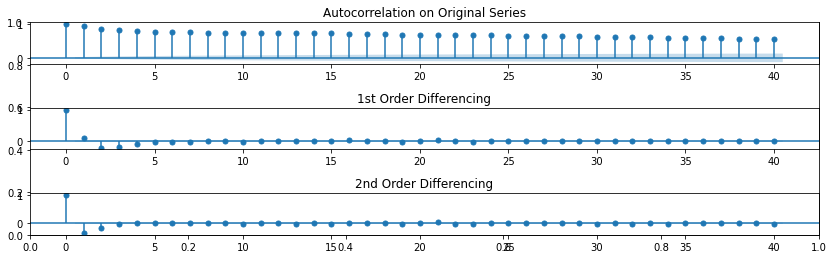

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
ax1 = fig.add_subplot(311)
fig2 = plot_acf(daily_sd, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig2 = plot_acf(daily_sd.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig2 = plot_acf(daily_sd.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")
fig.tight_layout()
fig2

In [2]:
plot_pacf(month_sd.diff().dropna(), lags=40)

NameError: name 'plot_pacf' is not defined

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

train = weekly_sd.iloc[:len(weekly_sd)- 52]
test = weekly_sd.iloc[len(weekly_sd) - 52:]

model = SARIMAX(train,
                order = (2, 0 ,0),
                seasonal_order =(2, 1, 0, 12) )
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     AvgTemperature   No. Observations:                 1273
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -3141.207
Date:                            Fri, 04 Dec 2020   AIC                           6292.415
Time:                                    05:45:11   BIC                           6318.113
Sample:                                01-02-1995   HQIC                          6302.071
                                     - 05-20-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7120      0.026     27.821      0.000       0.662       0.762
ar.L2          0.2163      0.026      8.469      0.000       0.166       0.266
ar.S.L12      -0.6187      0.027    -22.724      0.000      -0.672      -0.565
ar.S.L24      -0.3413      0.026    -13.307      0.000      -0.392      -0.291
sigma2         8.4878      0.319     26.589      0.000       7.862       9.113
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.42
Prob(Q):                              0.97   Prob(JB):                         0.07
Heteroskedasticity (H):               1.55   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

rmse(test, predictions)
mean_squared_error(test, predictions)

NameError: name 'predictions' is not defined

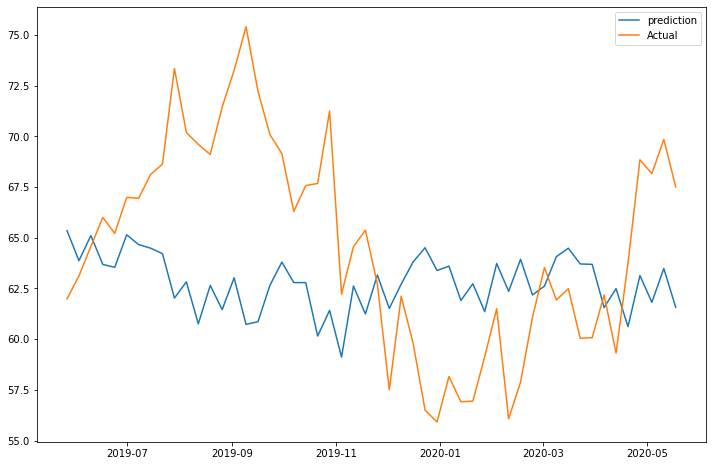

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end, typ='levels').rename('Predictions')

ax.plot(predictions, label= 'prediction')
ax.plot(test, label='Actual')
ax.legend()

In [7]:
model = SARIMAX(weekly_sd,  
                        order = (2, 0, 1),  
                        seasonal_order =(2, 1, 0, 12)) 
result = model.fit()

forecast = result.predict(start = len(weekly_sd) - 52 ,
                          end = (len(weekly_sd) - 1) + 8,
                          typ = 'levels').rename('Forecast')

fig, ax = plt.subplots(figsize=(20, 4), dpi=1600)
ax.plot(weekly_sd.iloc[-104:], label = 'Avg Temp', color = 'b')
ax.plot(forecast, label ='Forecast', color ='y', linewidth=2)
ax.legend()

Test MSE: 11.087


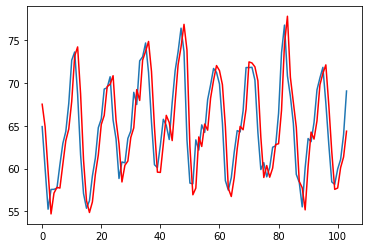

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = month_sd.values
size = int(len(X) * .66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')



In [17]:
ghg = replace_col_values(ghg, 'category', 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent', 'CO2 Emissions')
ghg = replace_col_values(ghg, 'category', 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent', 'Methane Emissions')
ghg = replace_col_values(ghg, 'category', 'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent', 'Hydrofluorocarbons Emissions')
ghg = replace_col_values(ghg, 'category', 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent', 'Nitrous Oxide Emissions')
ghg = replace_col_values(ghg, 'category', 'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent', 'Sulphur Hexafluoride Emissions')


NameError: name 'ghg' is not defined

In [18]:
ghg = ghg[ghg['category'].isin(['CO2 Emissions', 'Methane Emissions', 'Hydrofluorocarbons Emissions', 'Nitrous Oxide Emissions', 'Sulphur Hexafluoride Emissions'])]
ghg

NameError: name 'ghg' is not defined

In [19]:
ghg.loc[ghg['category'] =='CO2 Emissions']
ghg.drop('month', axis = 1)
ghg = ghg.groupby(['country_or_area', 'year', 'category']).sum('value').reset_index()

NameError: name 'ghg' is not defined

In [20]:
total_emissions = {'type' :ghg['category'],
                   'value': ghg['value'],
                   'year': ghg['year']}

total_emissions_df = pd.DataFrame(total_emissions)
total_emissions_df


NameError: name 'ghg' is not defined

In [21]:
total_emissions_df.groupby(['type', 'year']).sum('value').reset_index()
total_emissions_df.loc[total_emissions_df['year'] >= 1995]


NameError: name 'total_emissions_df' is not defined

In [22]:
ghg
ec_city_temp = city_temp.loc[(city_temp['Country'] == 'Equador')]
ec_city_temp = ec_city_temp.loc[ec_city_temp['Year'] < 2015]
guaya = ec_city_temp.loc[(city_temp['City'] == 'Guayaquil')]
quito = ec_city_temp.loc[(city_temp['City'] == 'Quito')]
#pd.date_range(start='1/1/1979', periods=len(ec_city_temp), freq='D')
guaya_df = ec_city_temp.drop(['Region', 'Country', 'City'], axis = 1)
guaya_df_months = guaya_df.drop('Day', axis = 1)
guaya_df_months = guaya_df_months.groupby(['Year', 'Month']).mean('AvgTemperature').reset_index()
guaya_df_months['Date'] = pd.date_range(start='1/1/1995', periods=len(guaya_df_months), freq='M')
guaya_df_months.index = guaya_df_months.Date
# ec_city_temp['Date'] = pd.date_range(start='1/1/1995', periods=len(ec_city_temp), freq='D')

guaya = guaya.drop(['Day', 'Region', 'Country'], axis = 1)
guaya = guaya.groupby(['Year', 'Month', ]).mean('AvgTemperature')
guaya.plot()
city_temp


NameError: name 'ghg' is not defined

In [23]:
# def rolling_mean_count(dte, months_back, months, df):
#     hours_back_start = (months_back + months) * 730
#     hours_back_end = months_back * 730
#     date_back_start = dte - timedelta(hours=hours_back_start)
#     date_back_end = dte - timedelta(hours=hours_back_end)
#     df_ss = df.loc[date_back_start:date_back_end]
#     rolling_mean = df_ss['AvgTemperature'].mean()
#     return rolling_mean

In [24]:
quito

NameError: name 'quito' is not defined

In [25]:

guaya_df_months = guaya_df_months.loc[guaya_df_months['AvgTemperature'] > 21]
guaya_df_months = guaya_df_months.loc[guaya_df_months['Year'] > 1994]


guaya_df_months

NameError: name 'guaya_df_months' is not defined

In [26]:
train_start = '1995-01-31'
train_end = '2010-12-31'

validation_start = '2011-01-31'
validation_end = '2012-12-31'

holdout_start = '2013-01-31'
holdout_end = '2014-12-31'

df_train = guaya_df_months.loc[train_start:train_end, :].copy()
df_validate = guaya_df_months.loc[validation_start: validation_end, :].copy()
df_holdout = guaya_df_months.loc[holdout_start:holdout_end, :].copy()
df_train['AvgTemperature'].plot(figsize=(12,4))

NameError: name 'guaya_df_months' is not defined

In [27]:
def is_summer(month):
    if (month == 6 or month == 7 or month == 8):
        return 1
    return 0

def is_spring(month):
    if (month == 3 or month == 4 or month == 5):
        return 1
    return 0

def is_fall(month):
    if (month == 9 or month == 10 or month == 11):
        return 1
    return 0

def is_winter(month):
    if (month == 12 or month == 1 or month == 2):
        return 1
    return 0

In [28]:
df_train['Winter'] = df_train['Month'].apply(is_winter)
df_validate['Winter'] = df_validate['Month'].apply(is_winter)
df_holdout['Winter'] = df_holdout['Month'].apply(is_winter)

df_train['Spring'] = df_train['Month'].apply(is_spring)
df_validate['Spring'] = df_validate['Month'].apply(is_spring)
df_holdout['Spring'] = df_holdout['Month'].apply(is_spring)

df_train['Summer'] = df_train['Month'].apply(is_summer)
df_validate['Summer'] = df_validate['Month'].apply(is_summer)
df_holdout['Summer'] = df_holdout['Month'].apply(is_summer)

df_train['Fall'] = df_train['Month'].apply(is_fall)
df_validate['Fall'] = df_validate['Month'].apply(is_fall)
df_holdout['Fall'] = df_holdout['Month'].apply(is_fall)



NameError: name 'df_train' is not defined

In [29]:
df_train['rolling'] = df_train['AvgTemperature'].rolling(6,center= True).mean()
df_validate['rolling'] = df_validate['AvgTemperature'].rolling(6,center= True).mean()
df_holdout['rolling'] = df_holdout['AvgTemperature'].rolling(6,center= True).mean()

df_holdout

NameError: name 'df_train' is not defined

In [30]:
df_Xytrain = df_train.loc['1995-04-30': '2010-10-31'].copy()
df_validateXy = df_validate.loc['2011-04-30': '2012-10-31'].copy()
df_hoXy = df_holdout.loc['2013-04-30': '2013-10-31'].copy()
df_X = df_Xytrain[['Year', 'Month', 'Summer', 'Spring', 'Winter', 'Fall', 'rolling']].copy()
y = df_Xytrain['AvgTemperature'].values

X = df_X.values

NameError: name 'df_train' is not defined

In [31]:
regressor = RandomForestRegressor()
regressor.fit(X,y)

NameError: name 'X' is not defined

In [32]:
df_X_validate = df_validateXy[['Year', 'Month', 'Summer', 'Spring', 'Winter', 'Fall', 'rolling']].copy()
X_validate = df_X_validate.values
y_validate = df_validateXy['AvgTemperature'].values

NameError: name 'df_validateXy' is not defined

In [33]:
y_hat_valid = regressor.predict(X_validate)
y_data_valid = np.hstack([y_hat_valid.reshape(-1, 1), y_validate.reshape(-1, 1)])

NameError: name 'X_validate' is not defined

In [34]:
df_y_validate = pd.DataFrame(index=df_X_validate.index, 
                             columns=['y_hat','y_validate'],
                             data = y_data_valid)

NameError: name 'df_X_validate' is not defined

In [35]:
ax = df_y_validate[['y_hat', 'y_validate']].plot(figsize=(12,4))

NameError: name 'df_y_validate' is not defined

In [36]:
#city_temp = city_temp.drop('Day', axis=1)
#city_temp = city_temp.groupby(['Country', 'City', 'Year', 'Month']).mean('AvgTemperature').reset_index()
city_temp.loc[(city_temp['Country'] == 'Uganda') & (city_temp['Year'] == 1995)]

Region Country     City  Month  Day  Year  AvgTemperature
234892  Africa  Uganda  Kampala      1    2  1995            75.1
234899  Africa  Uganda  Kampala      1    9  1995            69.7
234900  Africa  Uganda  Kampala      1   10  1995            74.6
234901  Africa  Uganda  Kampala      1   11  1995            73.3
234902  Africa  Uganda  Kampala      1   12  1995            73.8
...        ...     ...      ...    ...  ...   ...             ...
235251  Africa  Uganda  Kampala     12   27  1995            73.2
235252  Africa  Uganda  Kampala     12   28  1995            72.7
235253  Africa  Uganda  Kampala     12   29  1995            70.7
235254  Africa  Uganda  Kampala     12   30  1995            73.1
235255  Africa  Uganda  Kampala     12   31  1995            71.8

[298 rows x 7 columns]

In [11]:
city_temp = city_temp.loc[city_temp['Year'] >= 1995]
city_temp_years = city_temp.drop('Month', axis = 1).groupby(['Country', 'City', 'Year']).mean('AvgTemperature').reset_index()
city_temp_years = city_temp_years.loc[(city_temp_years['Year'] == 201) | (city_temp_years['Year'] == 1995)]
city_temp_years

Country          City  Year        Day  AvgTemperature
24       Algeria       Algiers  1995  15.754821       64.410468
50     Argentina  Buenos Aires  1995  15.720548       61.701370
76     Australia      Brisbane  1995  15.720548       67.837808
102    Australia      Canberra  1995  15.720548       55.386849
128    Australia     Melbourne  1995  15.720548       63.295068
...          ...           ...   ...        ...             ...
7840  Uzbekistan      Tashkent  1995  15.720548       59.083014
7866   Venezuela       Caracas  1995  15.720548       78.479726
7892     Vietnam         Hanoi  1995  15.720548       74.389041
7918  Yugoslavia      Belgrade  1995  15.720548       53.053973
7944      Zambia        Lusaka  1995  15.622857       72.919143

[314 rows x 5 columns]

In [12]:
city_temp_years_avg = city_temp_years.groupby(['Country', 'City', 'Year'])['AvgTemperature'].agg('max','min').diff().reset_index()
city_temp_years_avg

Country          City  Year  AvgTemperature
0       Algeria       Algiers  1995             NaN
1     Argentina  Buenos Aires  1995       -2.709098
2     Australia      Brisbane  1995        6.136438
3     Australia      Canberra  1995      -12.450959
4     Australia     Melbourne  1995        7.908219
..          ...           ...   ...             ...
309  Uzbekistan      Tashkent  1995       -0.544932
310   Venezuela       Caracas  1995       19.396712
311     Vietnam         Hanoi  1995       -4.090685
312  Yugoslavia      Belgrade  1995      -21.335068
313      Zambia        Lusaka  1995       19.865170

[314 rows x 4 columns]

In [13]:
city_temp_2019 = city_temp_years_avg.loc[city_temp_years_avg['Year'] == 2014]
city_temp_2019 = city_temp_2019.loc[city_temp_2019['AvgTemperature'] > 0]
city_temp_2019 = city_temp_2019.loc[city_temp_2019['AvgTemperature'] < 10]
city_temp_2019.nlargest(5, 'AvgTemperature')
city_temp_2019

Empty DataFrame
Columns: [Country, City, Year, AvgTemperature]
Index: []

In [14]:
df_X_ho = df_hoXy[['Year', 'Month', 'Summer', 'Spring', 'Winter', 'Fall', 'rolling']].copy()

X_holdout = df_X_ho.values

y_holdout = df_hoXy['AvgTemperature'].values

y_predict = regressor.predict(X_holdout)

y_compare = np.hstack([y_predict.reshape(-1,1), y_holdout.reshape(-1,1)])

df_y_compare = pd.DataFrame(index=df_X_ho.index, 
                           columns=['y_predict','y_holdout'],
                           data = y_compare)

ax = df_y_compare[['y_predict','y_holdout']].plot(figsize=(12,4))
ax.set_ylabel('Predicted count on holdout');

NameError: name 'df_hoXy' is not defined

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('ggplot')
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore") 
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore") 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

In [10]:
city_temps = pd.read_csv('../data/col_city_temps.csv')
city_temps = city_temps.drop('Unnamed: 0', axis = 1)

col_temps =  city_temps.drop(['Country', 'State', 'City', 'Region'], axis = 1)
col_temps['Date'] = pd.to_datetime(col_temps[['Year', 'Month', 'Day']])
col_temps = col_temps.drop(['Month', 'Day', 'Year'], axis = 1)
col_temps = col_temps.groupby('Date').mean()
col_temps = col_temps.resample('W-MON').mean()

In [4]:
col_mod = SARIMAX(col_temps, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4)).fit()

In [5]:
res = col_mod.resid

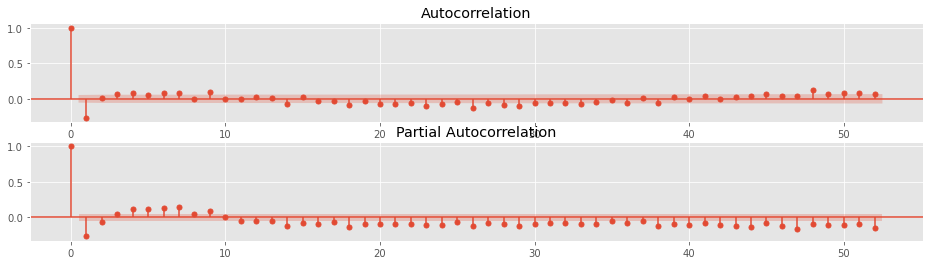

In [9]:
fig, axs = plt.subplots(2, figsize=(16, 4))
fig = sm.graphics.tsa.plot_acf(col_temps.diff()[1:], lags =  52, ax = axs[0])
fig = sm.graphics.tsa.plot_pacf(col_temps.diff()[1:], lags = 52, ax = axs[1])



In [7]:
def create_model(city, p, d, q, P, D, Q, m):
    '''
    Creates a Sarimax and returns your model and forecast on full dataset

    Args:
        city - series of a city
    
    Returns:
        Model fit to train data and forecast with city data
    '''
    train1 = city.iloc[:len(city)- 365*2]
    test1 = city.iloc[len(city) - 365*2:]

    model = SARIMAX(train1,
                    order = (p, d ,q),
                    seasonal_order =(P, D, Q, m) )
    result = model.fit()
    

    forecast = result.predict(start = len(city) -  365 ,
                              end = (len(city)) + 14,
                              typ = 'levels').rename('Forecast')
    return result, forecast

In [23]:
res, forecast = create_model(col_temps, 7, 1, 7, 7, 1, 7, 1)

ValueError: Seasonal periodicity must be greater than 1.

In [18]:
tr_start, tr_end = '2005-01-01', '2015-01-01'
te_start, te_end = '2015-01-02', '2019-12-12'
tra = col_temps[tr_start:tr_end]
tes = col_temps[te_start:te_end]

In [3]:
from pmdarima import auto_arima

In [16]:
tra


AvgTemperature
Date                      
2005-01-03       36.735714
2005-01-10       29.235714
2005-01-17       26.789286
2005-01-24       40.921429
2005-01-31       37.703571
...                    ...
2014-12-01       38.582143
2014-12-08       38.285714
2014-12-15       36.714286
2014-12-22       31.789286
2014-12-29       24.339286

[522 rows x 1 columns]

In [94]:
model = SARIMAX(tra,order = (2, 0, 2), seasonal_order = (2, 1, 0, 13))
result = model.fit()


In [ ]:
stepwise_fit = auto_arima(tra.dropna(), start_p = 1, start_q = 1, max_p = 4, max_q = 13, m = 90, start_P = 0, 
                          seasonal = True, d = None, D=1, trace = True, error_action = 'ignore', 
                          suppress_warning = True, stepwise = True)

In [4]:
forecast = result.predict(start = len(tra) - 104 ,
                              end = len(tra) + 400,
                              typ = 'levels').rename('Forecast')

NameError: name 'result' is not defined

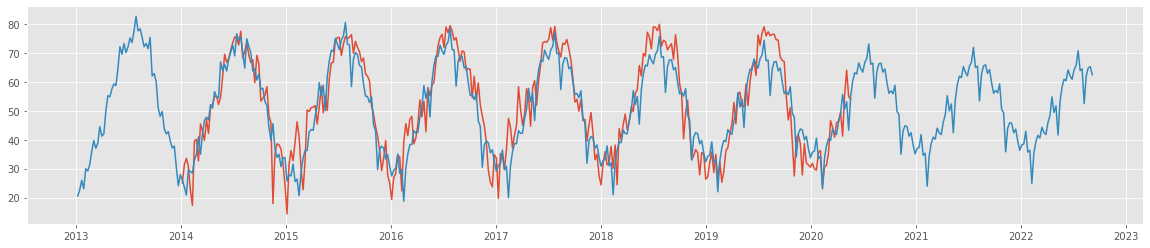

In [66]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(col_temps['2014':])
ax.plot(forecast, label = Forecast)

In [12]:
den = city_temps[city_temps['City'] == 'Denver']

In [13]:
den_2015 = den[(den['Year'] > 2005)]
den_2015 =  den_2015.drop(['Country', 'State', 'City', 'Region'], axis = 1)
den_2015['Date'] = pd.to_datetime(den_2015[['Year', 'Month', 'Day']])
den = den_2015
den_2015 = den_2015.drop(['Month', 'Day', 'Year'], axis = 1)
den_2015 = den_2015.groupby('Date').mean()
den_2015

AvgTemperature
Date                      
2006-01-01            45.7
2006-01-02            37.6
2006-01-03            49.1
2006-01-04            37.0
2006-01-05            34.9
...                    ...
2020-05-09            51.2
2020-05-10            48.3
2020-05-11            42.7
2020-05-12            50.6
2020-05-13            56.3

[5247 rows x 1 columns]

In [41]:
den = den.groupby('Date').mean()

In [59]:
den

Month  Day  Year  AvgTemperature       Date
13283      1    1  2006            45.7 2006-01-01
13284      1    2  2006            37.6 2006-01-02
13285      1    3  2006            49.1 2006-01-03
13286      1    4  2006            37.0 2006-01-04
13287      1    5  2006            34.9 2006-01-05
...      ...  ...   ...             ...        ...
18525      5    9  2020            51.2 2020-05-09
18526      5   10  2020            48.3 2020-05-10
18527      5   11  2020            42.7 2020-05-11
18528      5   12  2020            50.6 2020-05-12
18529      5   13  2020            56.3 2020-05-13

[5247 rows x 5 columns]

In [43]:
tr_start, tr_end = '2006', '2017'
te_start = '2017-01-01'
tra = den_2015[tr_start:tr_end]
tes = den_2015[te_start:]

In [44]:
stepwise_fit = auto_arima(den_2015, start_p = 1, start_q = 1,
                          max_p = 2, max_q = 2, m =52, start_P = 0, seasonal = True, d = 1, D=1, trace =True,
                          error_action = 'ignore', suppress_warning = True, stepwise = True)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [47]:
X = den_2015
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.433673
p-value: 0.000259
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [48]:
fig, axs = plt.subplots(2, figsize=(20, 8), dpi = 1000)
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags =  180, ax = axs[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags = 180, ax = axs[1], method='ywmle')

In [26]:
model = SARIMAX(tra, order = (7, 1,7), seasonal_order = (7, 1, 7, 14)).fit()

In [49]:
tra

AvgTemperature
Date                      
2006-01-01            45.7
2006-01-02            37.6
2006-01-03            49.1
2006-01-04            37.0
2006-01-05            34.9
...                    ...
2017-12-27            18.6
2017-12-28            38.1
2017-12-29            44.5
2017-12-30            14.6
2017-12-31            19.1

[4383 rows x 1 columns]

In [21]:
forecast = model.predict(start = len(tra) - 1000,
                              end = len(tra) + 1000,
                              typ = 'levels').rename('Forecast')

In [22]:
tra

AvgTemperature
Date                      
2006-01-01            45.7
2006-01-02            37.6
2006-01-03            49.1
2006-01-04            37.0
2006-01-05            34.9
...                    ...
2017-12-27            18.6
2017-12-28            38.1
2017-12-29            44.5
2017-12-30            14.6
2017-12-31            19.1

[4383 rows x 1 columns]

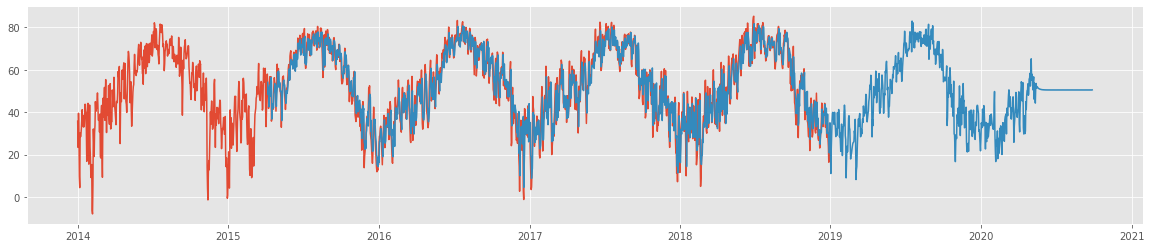

In [23]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(den_2015['2014':'2018'])
ax.plot(forecast)

In [14]:
result = seasonal_decompose(tra['AvgTemperature'], model = 'additive')

NameError: name 'tra' is not defined

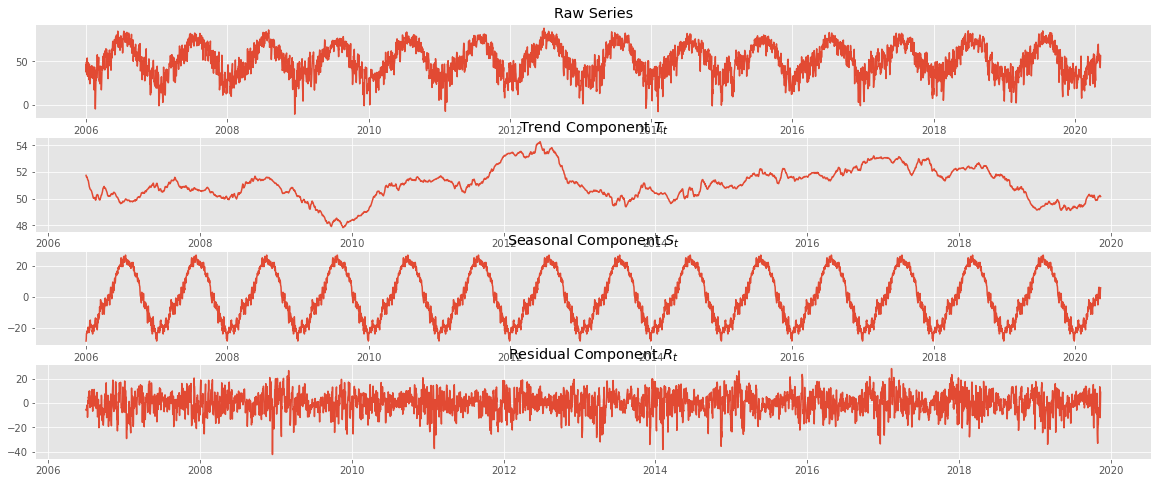

In [18]:
fig, axs = plt.subplots(4, figsize = (20, 8))
res = sm.tsa.seasonal_decompose(den_2015.AvgTemperature, freq=365)

plot_seasonal_decomposition(axs, den_2015, res)

In [182]:
den_2015['2015':'2015-01-30']

AvgTemperature
Date                      
2015-01-01            12.1
2015-01-02            21.3
2015-01-03            21.2
2015-01-04             4.2
2015-01-05            24.1
2015-01-06            41.1
2015-01-07            24.0
2015-01-08            37.4
2015-01-09            23.0
2015-01-10            33.6
2015-01-11            34.8
2015-01-12            26.7
2015-01-13            24.5
2015-01-14            29.5
2015-01-15            35.4
2015-01-16            42.2
2015-01-17            47.5
2015-01-18            46.6
2015-01-19            47.5
2015-01-20            34.3
2015-01-21            29.4
2015-01-22            21.5
2015-01-23            29.7
2015-01-24            38.6
2015-01-25            41.5
2015-01-26            49.8
2015-01-27            54.5
2015-01-28            51.1
2015-01-29            40.1
2015-01-30            37.4

In [101]:
from sklearn.preprocessing import MinMaxScaler


In [117]:
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(den_2015[['AvgTemperature']])
scaled_input = pd.DataFrame(scaled_input)
X = scaled_input

In [120]:
X.index = den_2015.index
X = X.rename(columns={0: 'MeanTemp'})

MeanTemp
Date                
2006-01-01  0.570997
2006-01-02  0.489426
2006-01-03  0.605237
2006-01-04  0.483384
2006-01-05  0.462236
...              ...
2020-05-09  0.626385
2020-05-10  0.597180
2020-05-11  0.540785
2020-05-12  0.620342
2020-05-13  0.677744

[5247 rows x 1 columns]

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [61]:
def is_summer(month):
    if (month == 6 or month == 7 or month == 8):
        return 1
    return 0

def is_spring(month):
    if (month == 3 or month == 4 or month == 5):
        return 1
    return 0

def is_fall(month):
    if (month == 9 or month == 10 or month == 11):
        return 1
    return 0

def is_winter(month):
    if (month == 12 or month == 1 or month == 2):
        return 1
    return 0

In [72]:
den

Month  Day  Year  AvgTemperature
Date                                        
2006-01-01      1    1  2006            45.7
2006-01-02      1    2  2006            37.6
2006-01-03      1    3  2006            49.1
2006-01-04      1    4  2006            37.0
2006-01-05      1    5  2006            34.9
...           ...  ...   ...             ...
2020-05-09      5    9  2020            51.2
2020-05-10      5   10  2020            48.3
2020-05-11      5   11  2020            42.7
2020-05-12      5   12  2020            50.6
2020-05-13      5   13  2020            56.3

[5247 rows x 4 columns]

In [53]:
def create_monthly_dummies(series):
    month = series.index.month
    # Only take 11 of the 12 dummies to avoid strict colinearity.
    return pd.get_dummies(month).iloc[:, :11]

create_monthly_dummies(den)

1   2   3   4   5   6   7   8   9   10  11
0      1   0   0   0   0   0   0   0   0   0   0
1      1   0   0   0   0   0   0   0   0   0   0
2      1   0   0   0   0   0   0   0   0   0   0
3      1   0   0   0   0   0   0   0   0   0   0
4      1   0   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
5242   0   0   0   0   1   0   0   0   0   0   0
5243   0   0   0   0   1   0   0   0   0   0   0
5244   0   0   0   0   1   0   0   0   0   0   0
5245   0   0   0   0   1   0   0   0   0   0   0
5246   0   0   0   0   1   0   0   0   0   0   0

[5247 rows x 11 columns]

<AxesSubplot:xlabel='Date'>

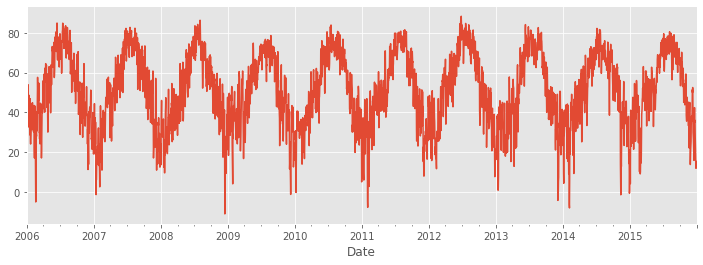

In [68]:
train_start = '2006'
train_end = '2015'

validation_start = '2016'
validation_end = '2017'

holdout_start = '2018'
holdout_end = '2019'

df_train = den.loc[train_start:train_end, :].copy()
df_validate = den.loc[validation_start: validation_end, :].copy()
df_holdout = den.loc[holdout_start:holdout_end, :].copy()
df_train['AvgTemperature'].plot(figsize=(12,4))

In [69]:
df_train['Winter'] = df_train['Month'].apply(is_winter)
df_validate['Winter'] = df_validate['Month'].apply(is_winter)
df_holdout['Winter'] = df_holdout['Month'].apply(is_winter)

df_train['Spring'] = df_train['Month'].apply(is_spring)
df_validate['Spring'] = df_validate['Month'].apply(is_spring)
df_holdout['Spring'] = df_holdout['Month'].apply(is_spring)

df_train['Summer'] = df_train['Month'].apply(is_summer)
df_validate['Summer'] = df_validate['Month'].apply(is_summer)
df_holdout['Summer'] = df_holdout['Month'].apply(is_summer)

df_train['Fall'] = df_train['Month'].apply(is_fall)
df_validate['Fall'] = df_validate['Month'].apply(is_fall)
df_holdout['Fall'] = df_holdout['Month'].apply(is_fall)

df_train['rolling'] = df_train['AvgTemperature'].rolling(7, min_periods = 7, center= True).mean()
df_validate['rolling'] = df_validate['AvgTemperature'].rolling(7,center= True).mean()
df_holdout['rolling'] = df_holdout['AvgTemperature'].rolling(7,center= True).mean()

In [75]:
df_train = df_train.dropna()
df_validate = df_validate.dropna()
df_holdout = df_holdout.dropna()

df_X = df_train[['Year', 'Month', 'Summer', 'Winter', 'Fall', 'Spring', 'rolling']].copy()
y = df_train['AvgTemperature'].values
X = df_X.values

In [81]:
def rolling_mean_count(dte, days_back, num_days, df):
    hours_back_start = (days_back + num_days)
    hours_back_end = days_back
    date_back_start = dte - timedelta(days=70)
    date_back_end = dte - timedelta(days=60)
    df_ss = df.loc[date_back_start:date_back_end]
    rolling_mean = df_ss['AvgTemperature'].mean()
    return rolling_mean

dte = df_train.index[500]
dbs = dte - timedelta(days=70)
dbe = dte - timedelta(days=60)
den_rolling = den.loc[dbs:dbe]



Month  Day  Year  AvgTemperature
Date                                        
2007-03-10      3   10  2007            47.0
2007-03-11      3   11  2007            44.6
2007-03-12      3   12  2007            52.2
2007-03-13      3   13  2007            56.6
2007-03-14      3   14  2007            53.3
2007-03-15      3   15  2007            43.4
2007-03-16      3   16  2007            42.4
2007-03-17      3   17  2007            56.9
2007-03-18      3   18  2007            55.4
2007-03-19      3   19  2007            55.0
2007-03-20      3   20  2007            55.3

In [77]:
# apply it to the dataframe
df_train['rolling_mean_count'] = df_train.apply(lambda x: rolling_mean_count(
                                                            x.index,
                                                            60,
                                                            10,
                                                            den), axis=1)

TypeError: unsupported operand type(s) for -: 'str' and 'datetime.timedelta'

In [101]:

df_X = df_train[['Month', 'Year', 'Winter', 'Spring', 'Summer', 'rolling']]
y = df_train['AvgTemperature'].values

X = df_X.values

In [102]:
regressor = RandomForestRegressor(n_estimators=1000)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=1000)

In [103]:
df_X_validate = df_validate[['Month', 'Year', 'Winter', 'Spring', 'Summer', 'rolling']].copy()
y_validate = df_validate['AvgTemperature'].values
X_validate = df_X_validate.values

In [107]:
den_2015

AvgTemperature
Date                      
2006-01-01            45.7
2006-01-02            37.6
2006-01-03            49.1
2006-01-04            37.0
2006-01-05            34.9
...                    ...
2020-05-09            51.2
2020-05-10            48.3
2020-05-11            42.7
2020-05-12            50.6
2020-05-13            56.3

[5247 rows x 1 columns]

In [104]:
y_hat_valid = regressor.predict(X_validate)
y_data_valid = np.hstack([y_hat_valid.reshape(-1,1), y_validate.reshape(-1,1)])

In [105]:
df_y_validate = pd.DataFrame(index=df_X_validate.index, 
                             columns=['y_hat','y_validate'],
                             data = y_data_valid)

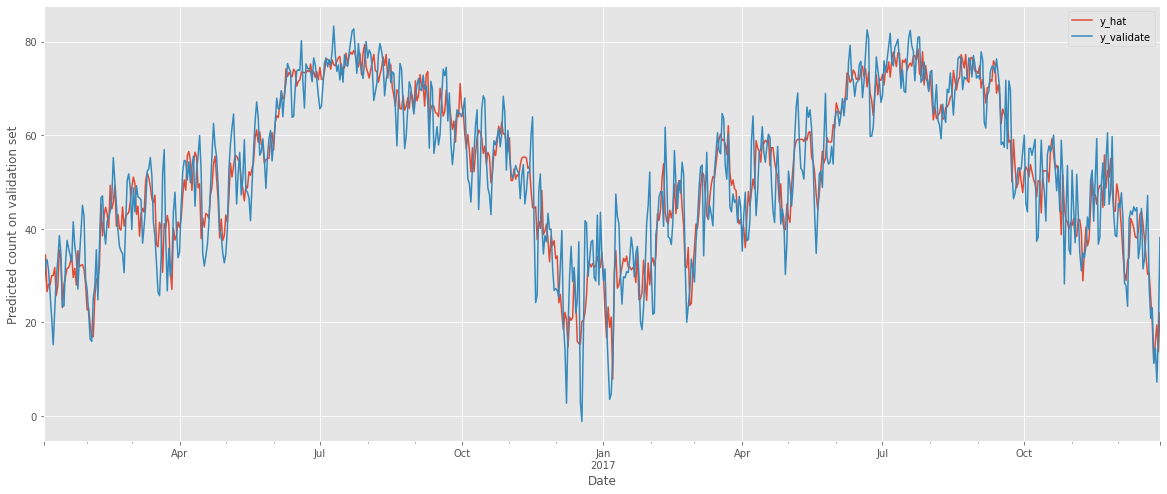

In [106]:
ax = df_y_validate[['y_hat', 'y_validate']].plot(figsize=(20,8))
ax.set_ylabel('Predicted count on validation set');

In [99]:
from sklearn.metrics import mean_absolute_error

In [100]:
mean_absolute_error(y_hat_valid, y_validate)

7.109887793336354

In [302]:
df_X_holdout = df_holdout[['Month', 'Year', 'Winter', 'Spring', 'Summer', 'rolling']].copy()
y_holdout = df_holdout['AvgTemperature'].values
X_holdout = df_X_holdout.values

In [305]:
y_predict = regressor.predict(X_holdout)
y_compare = np.hstack([y_predict.reshape(-1,1), y_holdout.reshape(-1,1)])

In [307]:
df_y_compare = pd.DataFrame(index=df_X_holdout.index, 
                           columns=['y_predict','y_holdout'],
                           data = y_compare)

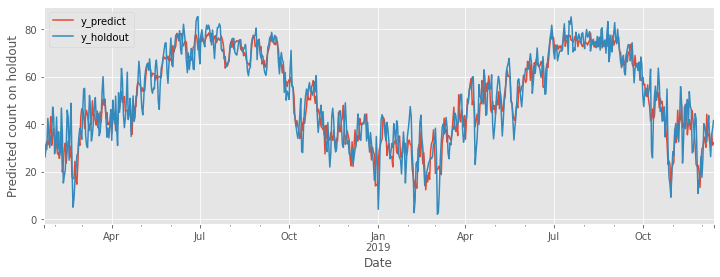

In [308]:
ax = df_y_compare[['y_predict','y_holdout']].plot(figsize=(12,4))
ax.set_ylabel('Predicted count on holdout');

In [108]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [5]:
city_temps = pd.read_csv('../data/city_temperature.csv')

In [8]:
city_temps.head(3)

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8